# Prototype Introducción

Nuestro proyecto se basa en la utilización de diferentes métodos de clasificación de imágenes de satélite, verificando que método es el más optimo de acuerdo al tiempo de computo y su precision, en una arena de clasificadores. 

Parte de esta libreta contiene como una primera impresion los datos y algunos métodos obtenidos del [siguiente repositorio](https://github.com/syamkakarla98/Satellite_Imagery_Analysis/blob/main/Classification/Land_Cover_Classification_in_Satellite_Imagery_using_Python.ipynb), llevando el trabajo que ahí se presenta más lejos de los que se encontraba en un estado inical.

Los datos usados son imágenes Sentinel-2, obtenidas del Parque Nacional Sundarbans, en Bangladesh. La siguiente tabla presenta una descripcion general de los datos.


| | |
| --- | --- |
| Satélite | Sentinel-2 |
| Fecha de adquisición | 27-01-2020 |
| Height | 954 |
| Width | 298 |
| # de Bandas | 12 |
| Resolucion espacial | 10-60 metros | 


Las imágenes ya se encontraban procesadas al momento de descargar los archivos, pues la finalidad es demostrar el uso de los diferentes métodos de Machine Learning. Es importante que de acuerdo a la ESA el No Data value es representado como 0 en los datos L2A.

Junto con estas imágenes, se descarga un archivo con extensión **.mat**, que es un archivo donde se encuentra la clasificación del terreno, es decir, los lugres que corresponden a cuerpos de agua, bosque, suelo desnudo, etc.


Para iniciar nuestra libreta vamos a llamar las primeras librerias de python, las cuales las usaremos para cargar nuestros datos, visualizar las imágenes, etc.

Es importante instalar **rasterio** para poder accesar y trabajar con los datos son complicaciones.



In [ ]:
!pip install rasterio

     |████████████████████████████████| 19.3MB 6.1MB/s 


In [ ]:
# Importar pandas para dataframes
import pandas as pd

# Importar librerias numericas
import numpy as np

# Importar las dependencias usadas para el uso de imagenes de satélite 
import rasterio as rio

# Importar las librerias de graficacion
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from rasterio.plot import show

# Importamos el path en forma de variable UNIX
from glob import glob

In [ ]:
# Montamos la carpeta y cargamos los datos usando glob
Sentinel_data = glob("/content/drive/MyDrive/Colab Notebooks/sunbarbans_data/*B?*.tiff")

# Acomodamos los datos en orden de las bandas
Sentinel_data.sort()

# Visualizamos el path de los archivos
Sentinel_data

['/content/drive/MyDrive/Colab Notebooks/sunbarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 '/content/drive/MyDrive/Colab Notebooks/sunbarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 '/content/drive/MyDrive/Colab Notebooks/sunbarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 '/content/drive/MyDrive/Colab Notebooks/sunbarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 '/content/drive/MyDrive/Colab Notebooks/sunbarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 '/content/drive/MyDrive/Colab Notebooks/sunbarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 '/content/drive/MyDrive/Colab Notebooks/sunbarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 '/content/drive/MyDrive/Colab Notebooks/sunbarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
 '/content/drive

In [ ]:
# Realizamos un array con las 12 imágenes

imagenes = []
labels = []
for i in range(0,len(Sentinel_data)):
  print(f"La banda {Sentinel_data[i][-14:-11]}, esta almacenado en la posicion {[i]} del array")
  labels.append(Sentinel_data[i][-14:-11])
  with rio.open(Sentinel_data[i], 'r') as d:
    imagenes.append(d.read(1))

arr_img = np.stack(imagenes)
arr_img = np.moveaxis(arr_img, 0, -1)

# Ahora vamos a verificar el arreglo de nuestro array

print(f"La dimension de nuestro array es:\n {arr_img.shape[2]} bandas (o canales)\n {arr_img.shape[0]} alto\n {arr_img.shape[1]} ancho")

La banda B01, esta almacenado en la posicion [0] del array
La banda B02, esta almacenado en la posicion [1] del array
La banda B03, esta almacenado en la posicion [2] del array
La banda B04, esta almacenado en la posicion [3] del array
La banda B05, esta almacenado en la posicion [4] del array
La banda B06, esta almacenado en la posicion [5] del array
La banda B07, esta almacenado en la posicion [6] del array
La banda B08, esta almacenado en la posicion [7] del array
La banda B09, esta almacenado en la posicion [8] del array
La banda B11, esta almacenado en la posicion [9] del array
La banda B12, esta almacenado en la posicion [10] del array
La banda B8A, esta almacenado en la posicion [11] del array
La dimension de nuestro array es:
 12 bandas (o canales)
 954 alto
 298 ancho


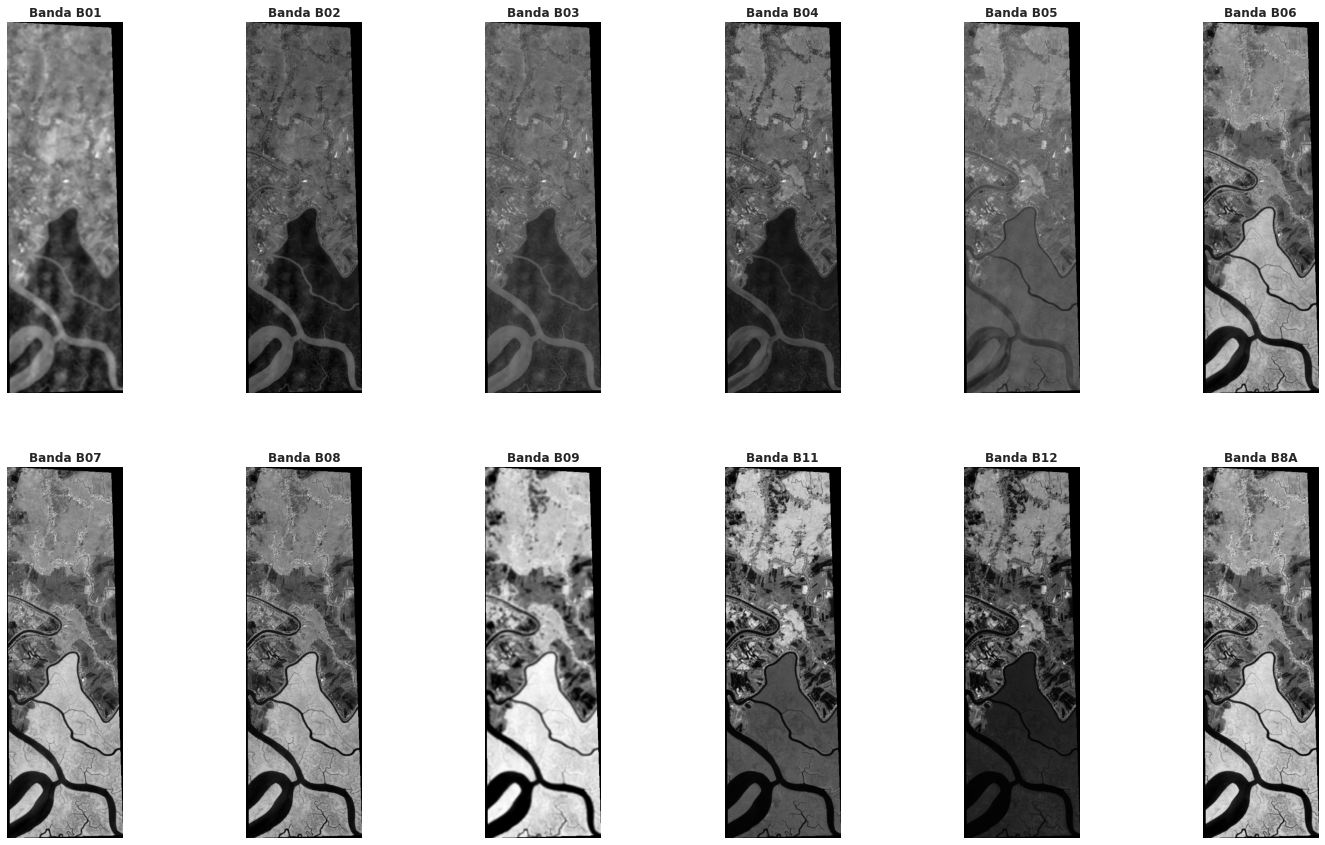

In [ ]:
# Vamos a mostrar las imagenes de satélite por cada banda
sns.set(style="white")
fig = plt.figure(figsize=(25, 15))
for i in range(1, len(labels) + 1 ):
    ax = fig.add_subplot(2, 6, i)
    show(arr_img[:,:,i-1], cmap='Greys_r', ax=ax, title=f"Banda {labels[i-1]}")
    plt.axis('off')

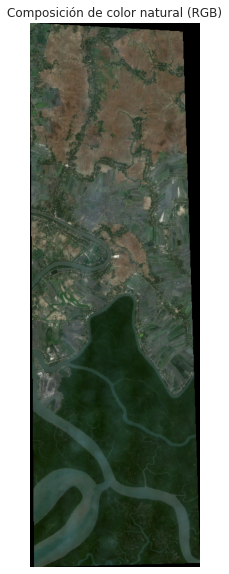

In [ ]:
# Ahora veamos como obtener una imagen de color natural con las bandas RGB

# Normaliza las bandas en escala de 0.0 - 1.0
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

# Seleccionamos los array que corresponde a cada banda 
red = arr_img[:,:,3]
green = arr_img[:,:,2]
blue = arr_img[:,:,1]

# Normalizamos con la funcion 
red_norm = normalize(red)
green_norm = normalize(green)
blue_norm = normalize(blue)

# Realizamos el Stack
rgb = np.dstack((red_norm, green_norm, blue_norm))

# Vemos la composicion de color
fig = plt.figure(figsize=(8, 10))
plt.imshow(rgb)
plt.title("Composición de color natural (RGB)")
plt.axis('off');

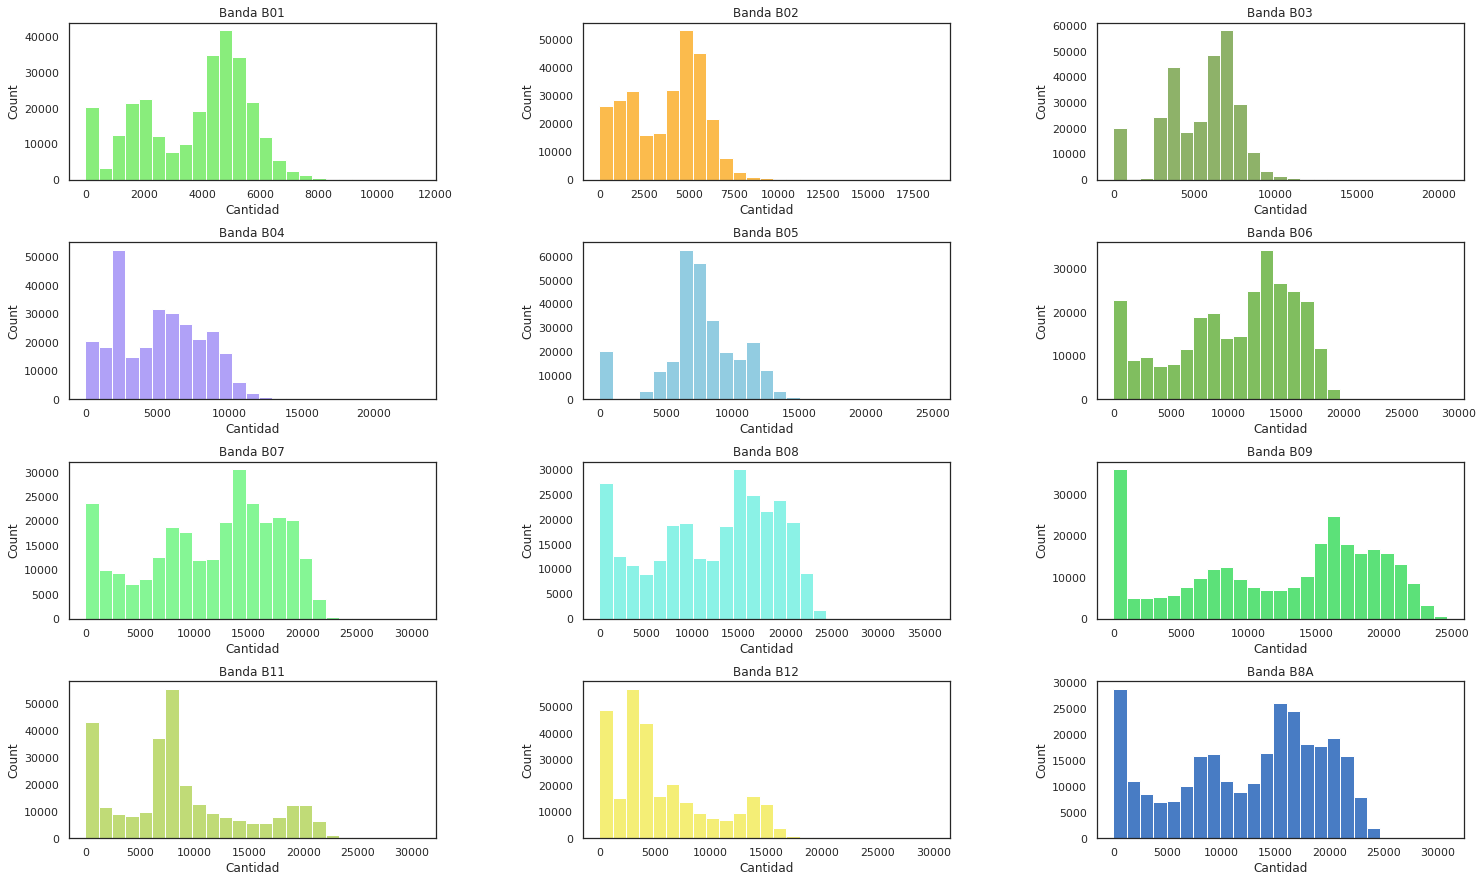

In [ ]:
# Ahora analizaremos los histogramas.
# Debemos recordar que filtrar los valores de 0 es importante y de igual forma

fig = plt.figure(figsize=(25, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(1, len(labels) + 1): #
    ax = fig.add_subplot(4, 3, i)
    sns.histplot(arr_img[:,:,i-1].flatten(),
                 color=np.random.rand(3,), bins = 25)
    ax.set_title(f"Banda {labels[i-1]}")
    ax.set(xlabel="Cantidad")

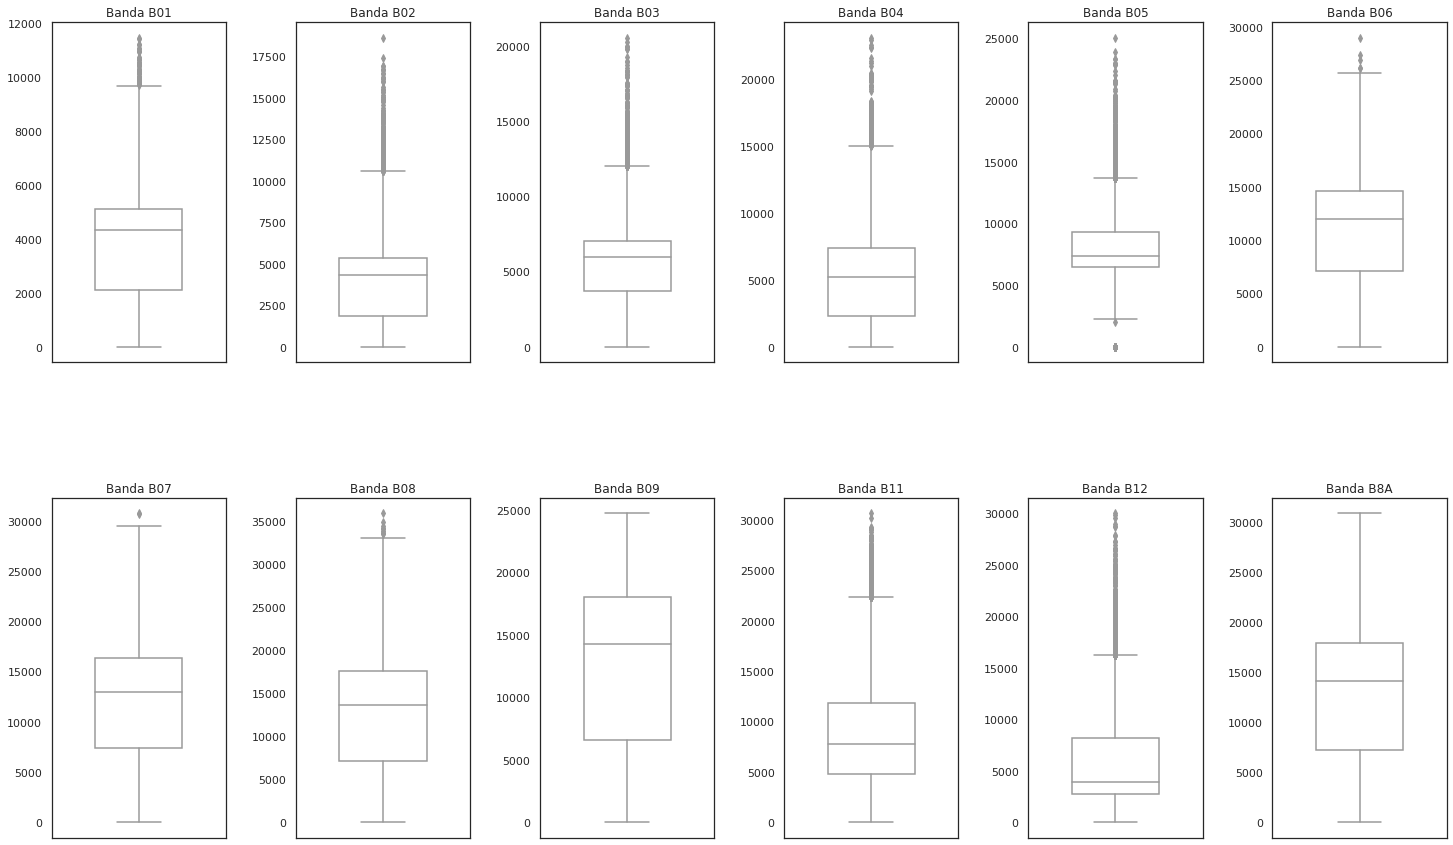

In [ ]:
# Veamos los bloxplots

fig = plt.figure(figsize=(25, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(1, len(labels) + 1 ):
    ax = fig.add_subplot(2, 6, i)
    sns.boxplot(y=arr_img[:,:,i-1].flatten(),
                color='white', width=.5)
    ax.set_title(f"Banda {labels[i-1]}")

plt.show()

La dimension de nuestros valores del terreno
 954 alto
 298 ancho


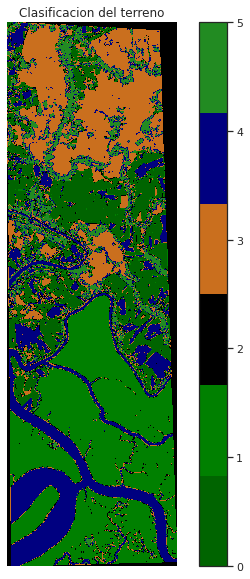

In [ ]:
# Cargamos los valores del terreno como valores de Y, los mostramos

# Agregamos la libreria
from scipy.io import loadmat

# Agregamos los datos
y_data = loadmat('/content/drive/MyDrive/Colab Notebooks/sunbarbans_data/Sundarbands_gt.mat')['gt']

# Verificamos que tenga las mismas dimensiones
print(f"La dimension de nuestros valores del terreno\n {y_data.shape[0]} alto\n {y_data.shape[1]} ancho")

# Hacemos un plot
class_color = ListedColormap(['darkgreen', 'green', 'black', '#CA6F1E', 'navy', 'forestgreen'])
plt.figure(figsize=(8, 10))
plt.imshow(y_data, cmap=class_color)
plt.title("Clasificacion del terreno")
plt.colorbar()
plt.axis('off');

# Separación, validación y evaluación para algoritmos de ML

Dentro de este apartado realizaremos una estandarizacion de los datos moviendo la media a 0 y la desviacion estandar a la unidad.

Después de este proceso procederemos a realizar la separación en entrenamiento y prueba para clasificar nuestras imágenes...

In [ ]:
# Cargamos nuestra libreria
from sklearn.preprocessing import StandardScaler

# Hacemos un reshape para dividir todos los datos de forma lineal, en cada una de las bandas
X_data = arr_img.reshape(-1, 12)

# Realizamos la estandarizacion
scaler = StandardScaler().fit(X_data)
X_estan = scaler.transform(X_data)
print(f"La nueva dimensión del array es {X_estan.shape}")
954*298



La nueva dimensión del array es (284292, 12)


284292

In [ ]:
# Ahora a dividir nuestro array con las imágenes 
from sklearn.model_selection import train_test_split

# Es importante usar el .ravel() pues de esta forma nuestro array tendra las 
# mismas dimensiones al array con las 12 imagenes de satélite
X_train, X_test, y_train, y_test = train_test_split(X_estan, y_data.ravel(), 
                                  test_size=0.30, stratify = y_data.ravel(), random_state=50)
print(f'Dimensiones X_train: {X_train.shape}\nDimension X_test: {X_test.shape}\nDimension y_train: {y_train.shape}\nDimension y_test:{y_test.shape}')

Dimensiones X_train: (199004, 12)
Dimension X_test: (85288, 12)
Dimension y_train: (199004,)
Dimension y_test:(85288,)


In [ ]:
# Validacion cruzada
from sklearn.model_selection import KFold  

# Dejarlo y analizarlo con el experto

# Clasificación no supervisada: K Means Clustering y reduccion usando PCA

Para este apartado no usaremos los dataset de entrenamiento y prueba, veremos los resultados que obtenemos a partir de una clasificación no supervisada.

Usaremos el analisis de componentes principales, así como el método del inercia para poder encontrar el número de 

In [ ]:
%%time

from sklearn.decomposition import PCA

# analisis de componentes principales, usando los datos previamente preprocesados
pca = PCA(n_components = 6)

pca.fit(X_estan)

data_pca = pca.transform(X_estan)

print("La varianza explicada en cada componente principal es:")
for i in range(0, len(pca.explained_variance_ratio_)):
    print(f"PCA{i+1} = {pca.explained_variance_ratio_[i]}")
print(f"El total de la varianza dentro de las componentes es:\n {np.sum(pca.explained_variance_ratio_)}")

La varianza explicada en cada componente principal es:
PCA1 = 0.5577819833563339
PCA2 = 0.37521241718137965
PCA3 = 0.048422199951814945
PCA4 = 0.006375264845372212
PCA5 = 0.00490527950207077
PCA6 = 0.0035114799598534854
El total de la varianza dentro de las componentes es:
 0.9962086247968249
CPU times: user 974 ms, sys: 939 ms, total: 1.91 s
Wall time: 1.07 s


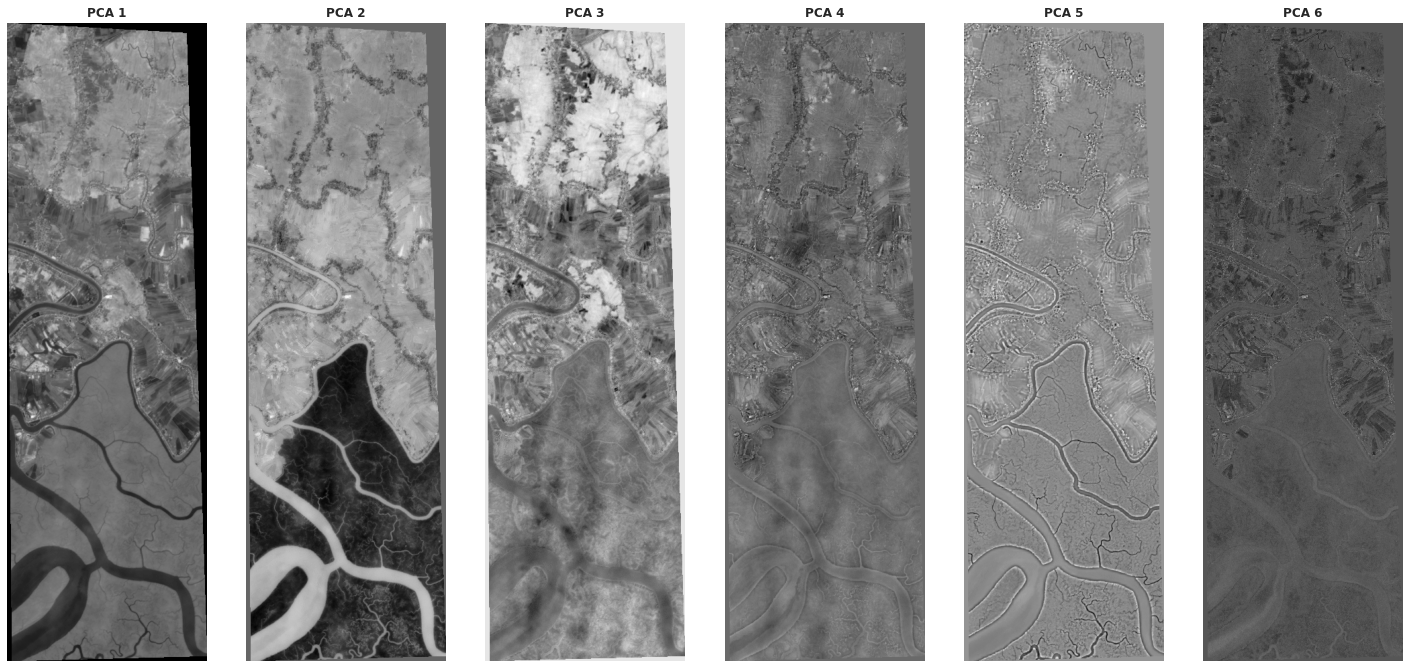

In [ ]:
# Vamos a hacer un plot de nuestras PCA
# Primero realizaremos un reshape para regresarlos a la misma 
# forma que los datos originales, y que tengan la misma dimensiones

data_pca_reshape = data_pca.reshape((954, 298, data_pca.shape[1]))

# Loop para visualizar nuestras componentes
fig = plt.figure(figsize=(25, 15))
for i in range(1, 6 + 1 ):
    ax = fig.add_subplot(1, 6, i)
    show(data_pca_reshape[:,:,i-1], cmap='Greys_r', ax=ax, title=f"PCA {i}")
    plt.axis('off')

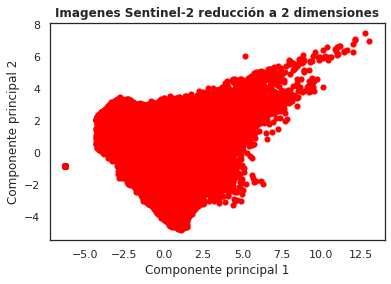

In [ ]:
# ahora graficaremos nuestras dos primeras componentes 

plt.scatter(x=data_pca_reshape[:,:,0], y=data_pca_reshape[:,:,1], color='red',lw=0.1)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Imagenes Sentinel-2 reducción a 2 dimensiones',fontweight='bold')
plt.show()

In [ ]:
# Inercia
import sklearn.cluster as cluster
from tqdm import tqdm

inertia = []
for i in tqdm(range(2,12)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=50)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)

100%|██████████| 10/10 [02:02<00:00, 12.25s/it]


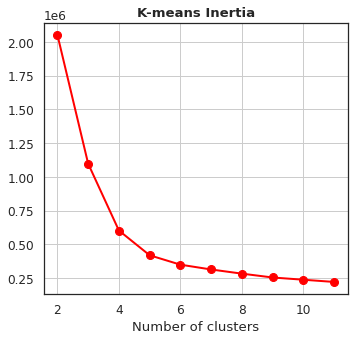

In [ ]:
# Finalmente realizamos el plot
sns.set(style='white',font_scale=1.1, rc={'figure.figsize':(12,5)})

plt.subplot(1, 2, 1)

plt.plot(range(2,len(inertia)+2), inertia, marker='o',lw=2,ms=8,color='red')
plt.xlabel('Number of clusters')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

A partir de la gráfica anterior nos dice que debemos realziar la clasificacion en 6, lo cual tiene mucha logica teniendo en cuenta que los valores reales del terreno vienen en 6 clasificaciones. A continuación usaremos el método de k-means para realizar la clasificación

In [ ]:
%%time
# Ahora vamos a realizar nuestra clasificacion

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=25, init="k-means++")

kmeans.fit(data_pca)

clasificacion = kmeans.predict(data_pca)

CPU times: user 5.55 s, sys: 1.64 s, total: 7.2 s
Wall time: 5.35 s


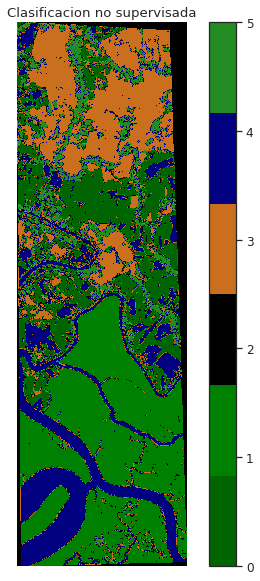

In [ ]:
# Veamos nuestros resultados
plt.figure(figsize=(8, 10))
plt.imshow(clasificacion.reshape(954, 298), cmap=class_color)
plt.title("Clasificacion no supervisada")
plt.colorbar()
plt.axis('off');

In [ ]:
# import plotly.express as px

# fig = px.imshow(clasificacion.reshape(954, 298), color_continuous_scale ='Spectral_r')

# fig.update_xaxes(showticklabels=False)

# fig.update_yaxes(showticklabels=False)

# fig.update_layout(
#     autosize=False,
#     width=1200,
#     height=698,
#     margin=dict(
#         l=50,
#         r=50,
#         b=100,
#         t=100,
#         pad=4
#     ),
#     paper_bgcolor="LightSteelBlue",
# )

# Clasificación supervisada: K means

Ahora usando el algoritmo de K-means, los datos de entrenamiento y prueba previamente clasificacos, realizaremos la clasificación supervisada de las imágenes de satélite.

In [ ]:
%%time
# Hacemos el modelo con 6 clusters, que son los valores clasificados del terreno
kmeans_sup = KMeans(n_clusters=6, random_state=25)

# Obtenemos el fit entre los datos de entrenamiento
kmeans_sup.fit(X_train, y_train)

# Hacemos predicciones
kmeans_sup_pred = kmeans_sup.predict(X_test)

CPU times: user 4.37 s, sys: 1.56 s, total: 5.93 s
Wall time: 4.16 s


In [ ]:
# Cargamos las librerias con metricas
from sklearn.metrics import classification_report, accuracy_score

# Calculamos la precisión
print(f"Precisión: {accuracy_score(y_test, kmeans_sup_pred)*100}")

# Realizamos el reporte de clasificacion
print(classification_report(y_test, kmeans_sup_pred))

Precisión: 19.659272113310198
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     16222
           1       0.00      0.00      0.00     23570
           2       0.00      0.00      0.00      6095
           3       1.00      1.00      1.00     16790
           4       0.00      0.00      0.00     13545
           5       0.00      0.00      0.00      9066

    accuracy                           0.20     85288
   macro avg       0.17      0.17      0.17     85288
weighted avg       0.20      0.20      0.20     85288



CPU times: user 163 ms, sys: 70 ms, total: 233 ms
Wall time: 149 ms


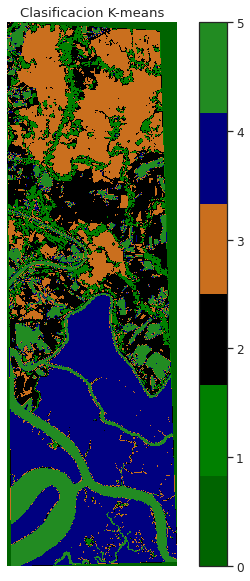

In [ ]:
%%time

# Vamos a ver nuestros resultados

plt.figure(figsize=(8, 10))
plt.imshow(kmeans_sup.predict(X_estan).reshape((954, 298)), cmap=class_color)
plt.title("Clasificacion K-means")
plt.colorbar()
plt.axis('off');

# Clasificacion supervisada: K-Nearest Neighbor Classifier (K-NNC)

In [ ]:
%%time

# Importamos la libreria
from sklearn.neighbors import KNeighborsClassifier

# Hacemos el modelo con 6 clusters, que son los valores clasificados del terreno
knn = KNeighborsClassifier(n_neighbors=6)

# Obtenemos el fit entre los datos de entrenamiento
knn.fit(X_train, y_train)

# Hacemos predicciones
knn_pred = knn.predict(X_test)

CPU times: user 26.5 s, sys: 7.43 ms, total: 26.5 s
Wall time: 26.4 s


In [ ]:
# Calculamos la precisión
print(f"Precisión: {accuracy_score(y_test, knn_pred)*100}")

# Realizamos el reporte de clasificacion
print(classification_report(y_test, knn_pred))

Precisión: 98.9506143888941
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     16222
           1       1.00      1.00      1.00     23570
           2       1.00      1.00      1.00      6095
           3       0.99      0.99      0.99     16790
           4       1.00      0.99      0.99     13545
           5       0.98      0.95      0.97      9066

    accuracy                           0.99     85288
   macro avg       0.99      0.99      0.99     85288
weighted avg       0.99      0.99      0.99     85288



CPU times: user 1min 2s, sys: 43.9 ms, total: 1min 2s
Wall time: 1min 1s


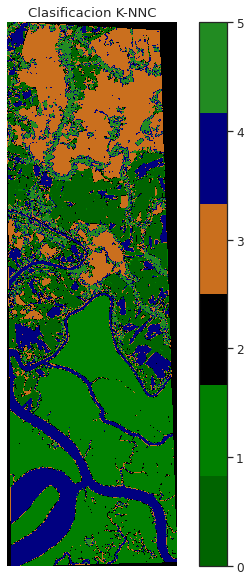

In [ ]:
%%time

# Vamos a ver nuestros resultados

plt.figure(figsize=(8, 10))
plt.imshow(knn.predict(X_estan).reshape((954, 298)), cmap=class_color)
plt.title("Clasificacion K-NNC")
plt.colorbar()
plt.axis('off');

# Arboles de decision: Decision tree

Ahora usaremos arboles de decisión para observar como nuestra clasificación puede variar o no de los datos del terreno. De igual forma analizar el tiempo de computo requerido para esta clasificacion.

In [ ]:
%%time

# Importamos la libreria
from sklearn.tree import DecisionTreeClassifier

# Agregamos el modelo
dtc = DecisionTreeClassifier()

# Realizamos nuestra clasificacion usando los datos de entrenamiento
dtc = dtc.fit(X_train, y_train)

# Prediccion en los datos de prueba
dtc_pred = dtc.predict(X_test)

CPU times: user 3.13 s, sys: 2.54 ms, total: 3.13 s
Wall time: 3.12 s


In [ ]:
# Calculamos la precisión
print(f"Precisión: {accuracy_score(y_test, dtc_pred)*100}")

# Realizamos el reporte de clasificacion
print(classification_report(y_test, dtc_pred))

Precisión: 97.81329143607542
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     16222
           1       0.99      0.99      0.99     23570
           2       1.00      1.00      1.00      6095
           3       0.99      0.99      0.99     16790
           4       0.98      0.98      0.98     13545
           5       0.94      0.93      0.93      9066

    accuracy                           0.98     85288
   macro avg       0.98      0.98      0.98     85288
weighted avg       0.98      0.98      0.98     85288



CPU times: user 68.5 ms, sys: 418 µs, total: 68.9 ms
Wall time: 69.3 ms


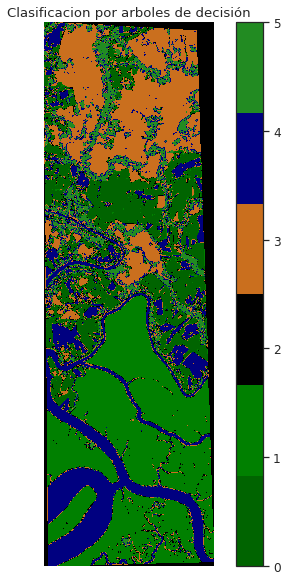

In [ ]:
%%time

# Vamos a ver nuestros resultados, y la clasificacion de todos los datos

plt.figure(figsize=(8, 10))
plt.imshow(dtc.predict(X_estan).reshape((954, 298)), cmap=class_color)
plt.title("Clasificacion por arboles de decisión")
plt.colorbar()
plt.axis('off');

# Arboles de decision: Random Forest

De manera similar, ahora usaremos el random forest para analizar nuestra clasificación.

In [ ]:
%%time

# Importamos la libreria
from sklearn.ensemble import RandomForestClassifier

# Agregamos el modelo
rfc = RandomForestClassifier()

# Realizamos nuestra clasificacion usando los datos de entrenamiento
rfc = rfc.fit(X_train, y_train)

# Prediccion en los datos de prueba
rfc_pred = rfc.predict(X_test)

CPU times: user 49.3 s, sys: 81.5 ms, total: 49.4 s
Wall time: 49.2 s


In [ ]:
# Calculamos la precisión
print(f"Precisión: {accuracy_score(y_test, rfc_pred)*100}")

# Realizamos el reporte de clasificacion
print(classification_report(y_test, rfc_pred))

Precisión: 99.00220429603228
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     16222
           1       1.00      1.00      1.00     23570
           2       1.00      1.00      1.00      6095
           3       0.99      0.99      0.99     16790
           4       0.99      0.99      0.99     13545
           5       0.97      0.97      0.97      9066

    accuracy                           0.99     85288
   macro avg       0.99      0.99      0.99     85288
weighted avg       0.99      0.99      0.99     85288



CPU times: user 3.24 s, sys: 18.7 ms, total: 3.26 s
Wall time: 3.26 s


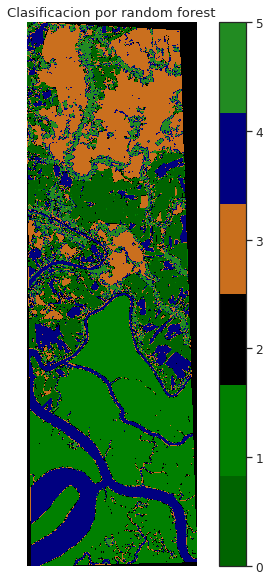

In [ ]:
%%time

# Vamos a ver nuestros resultados, y la clasificacion de todos los datos

plt.figure(figsize=(8, 10))
plt.imshow(rfc.predict(X_estan).reshape((954, 298)), cmap=class_color)
plt.title("Clasificacion por random forest")
plt.colorbar()
plt.axis('off');

# Arboles de decision: Decision tree regression

In [ ]:
%%time
# importamos el decision tree regresion
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

# Realizamos nuestra clasificacion usando los datos de entrenamiento
dtr = dtr.fit(X_train, y_train)

# Prediccion en los datos de prueba
dtr_pred = dtr.predict(X_test)

CPU times: user 2.85 s, sys: 2.05 ms, total: 2.85 s
Wall time: 2.85 s


In [ ]:
# Calculamos la precisión
print(f"Precisión: {accuracy_score(y_test, dtr_pred)*100}")

# Realizamos el reporte de clasificacion
print(classification_report(y_test, dtr_pred))

Precisión: 97.74059656692617
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     16222
           1       0.99      0.99      0.99     23570
           2       1.00      1.00      1.00      6095
           3       0.98      0.99      0.99     16790
           4       0.98      0.98      0.98     13545
           5       0.93      0.93      0.93      9066

    accuracy                           0.98     85288
   macro avg       0.98      0.98      0.98     85288
weighted avg       0.98      0.98      0.98     85288



CPU times: user 74 ms, sys: 0 ns, total: 74 ms
Wall time: 75.4 ms


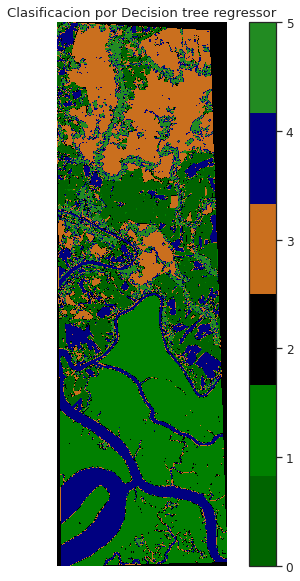

In [ ]:
%%time

# Vamos a ver nuestros resultados, y la clasificacion de todos los datos

plt.figure(figsize=(8, 10))
plt.imshow(dtr.predict(X_estan).reshape((954, 298)), cmap=class_color)
plt.title("Clasificacion por Decision tree regressor")
plt.colorbar()
plt.axis('off');

# Arboles de decision: Decision tree regression con AdaBoost

Este algoritmo funciona de la misma forma que el anterior, con la diferencia de que tiene diferentes estimadores, es decir, usa usa mas arboles de decision (boosts) para que la regresion se ajuste con mayor detalle.

In [ ]:
%%time
# importamos AdaBoost
from sklearn.ensemble import AdaBoostRegressor

# Usaremos un modelo con 200 arboles de decision
adtr = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=200, random_state=25)

# Realizamos nuestra clasificacion usando los datos de entrenamiento
adtr = adtr.fit(X_train, y_train)

# Prediccion en los datos de prueba
adtr_pred = adtr.predict(X_test)


CPU times: user 4min 53s, sys: 528 ms, total: 4min 53s
Wall time: 4min 52s


In [ ]:
# Calculamos la precisión
print(f"Precisión: {accuracy_score(y_test, adtr_pred)*100}")

# Realizamos el reporte de clasificacion
print(classification_report(y_test, adtr_pred))

Precisión: 99.15931901322578
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     16222
           1       1.00      1.00      1.00     23570
           2       1.00      1.00      1.00      6095
           3       0.99      1.00      0.99     16790
           4       0.99      0.99      0.99     13545
           5       0.98      0.97      0.98      9066

    accuracy                           0.99     85288
   macro avg       0.99      0.99      0.99     85288
weighted avg       0.99      0.99      0.99     85288



CPU times: user 7.06 s, sys: 535 ms, total: 7.59 s
Wall time: 7.56 s


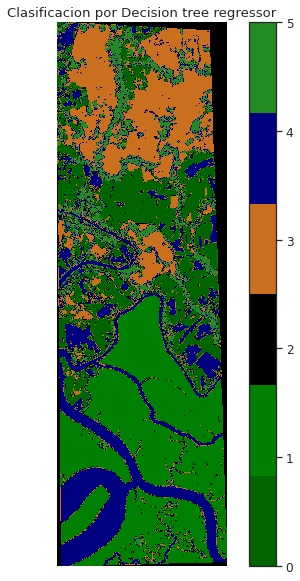

In [ ]:
%%time

# Vamos a ver nuestros resultados, y la clasificacion de todos los datos

plt.figure(figsize=(8, 10))
plt.imshow(adtr.predict(X_estan).reshape((954, 298)), cmap=class_color)
plt.title("Clasificacion por Decision tree regressor")
plt.colorbar()
plt.axis('off');

# Problemas de regresion

Aquí analizaremos si hay alguna relación entre las diferentes bandas y ver si podemos hacer una predicción para poder clasificar nuestra imagen: Decision tree regression!

Para poder revisar los datos, usaremos los datos estandarizados...

In [ ]:
df_img_std = pd.DataFrame()

for i in range(0,len(labels)):
  df_img_std[labels[i]] = pd.Series(X_estan.reshape(954,298,-1)[:,:,i].flatten())


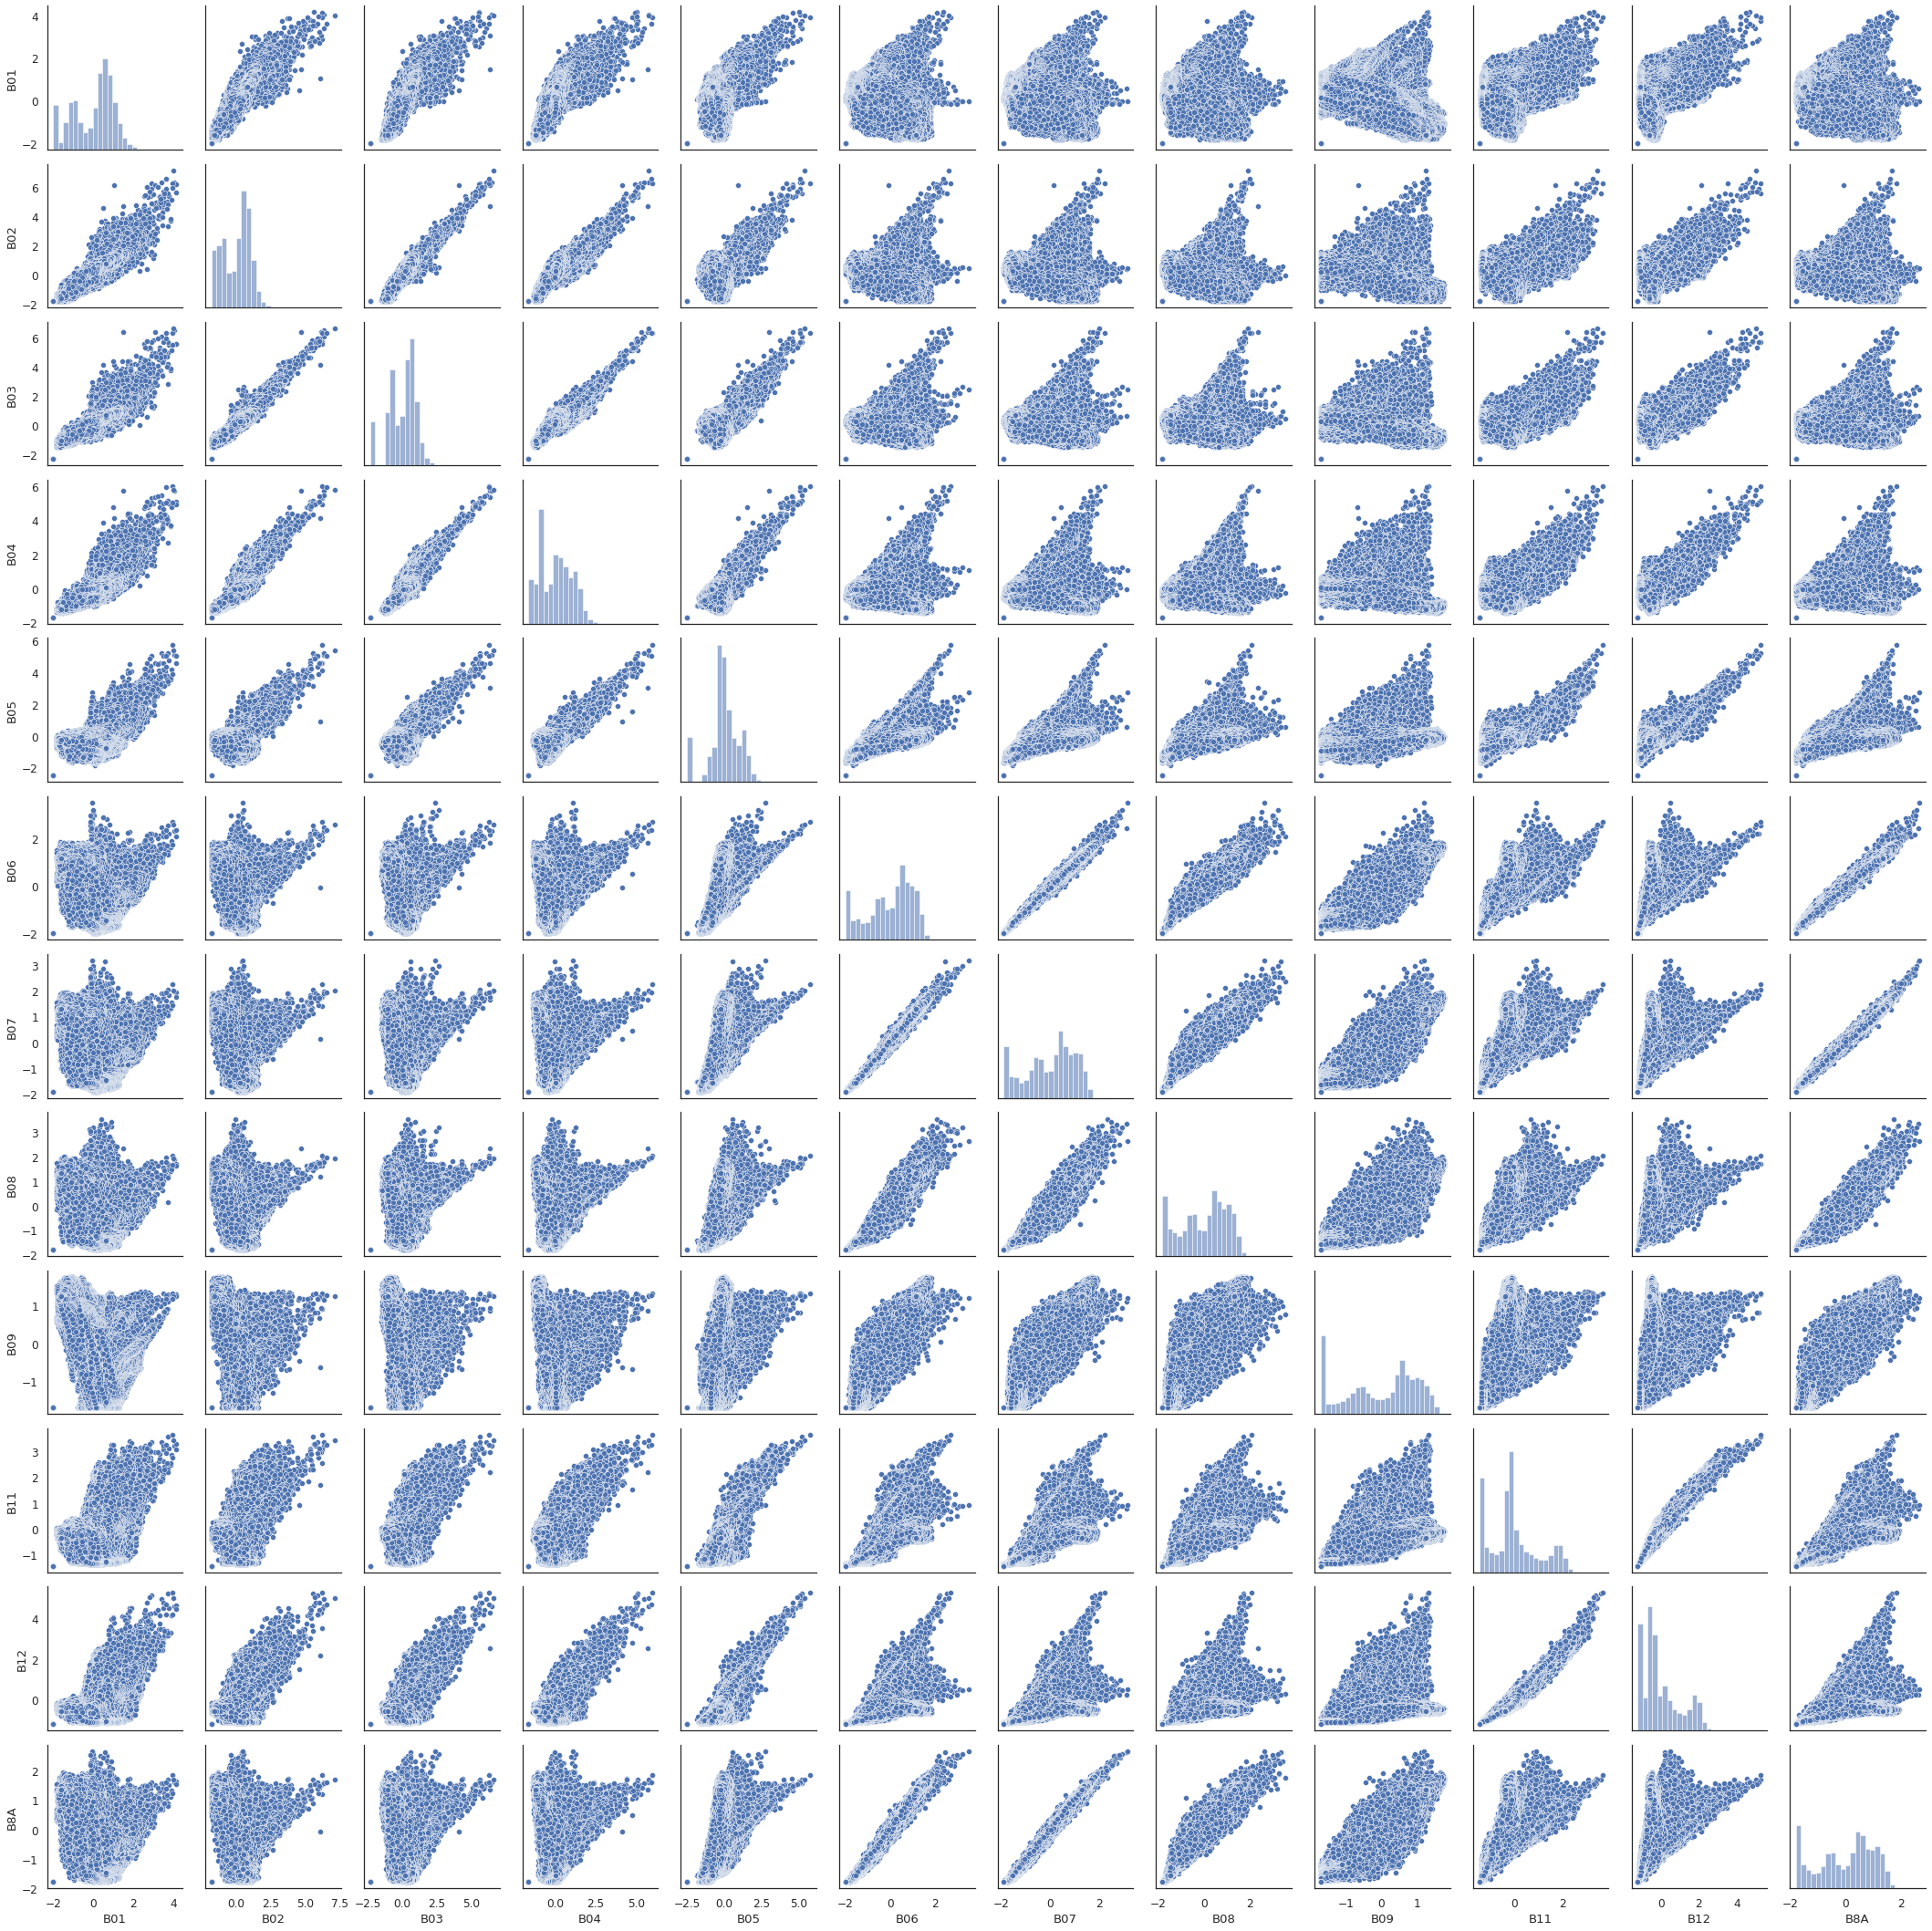

In [ ]:
sns.pairplot(df_img_std, diag_kind = "hist", diag_kws = {'alpha':0.55, 'bins':25})


In [ ]:
# Clasificacion usando modelo de regresion lineal
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# Realizamos nuestra clasificacion usando los datos de entrenamiento
lr = lr.fit(X_train, y_train)

# Prediccion en los datos de prueba
lr_pred = lr.predict(X_test)

In [ ]:
# Calculamos la precisión
print(f"Precisión: {accuracy_score(y_test, np.around(lr_pred,0))*100}")

# Realizamos el reporte de clasificacion
print(classification_report(y_test,  np.around(lr_pred,0)))

Precisión: 36.3579870556233
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.02      0.00      0.00     16222
         1.0       0.85      0.56      0.68     23570
         2.0       0.15      1.00      0.27      6095
         3.0       0.41      0.67      0.51     16790
         4.0       0.22      0.03      0.05     13545
         5.0       0.70      0.00      0.01      9066
         6.0       0.00      0.00      0.00         0

    accuracy                           0.36     85288
   macro avg       0.30      0.28      0.19     85288
weighted avg       0.44      0.36      0.31     85288



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CPU times: user 68.4 ms, sys: 44.2 ms, total: 113 ms
Wall time: 72.7 ms


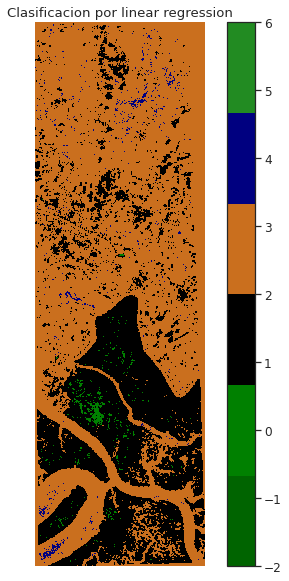

In [ ]:
%%time

# Vamos a ver nuestros resultados, y la clasificacion de todos los datos

plt.figure(figsize=(8, 10))
plt.imshow(np.around(lr.predict(X_estan), 0).reshape((954, 298)), cmap=class_color)
plt.title("Clasificacion por linear regression")
plt.colorbar()
plt.axis('off');

# Redes Neuronales

# Arena de clasificacidores:



In [ ]:
from sklearn.metrics import mean_absolute_error